In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from insertion_sort import insertion_sort
from selection_sort import selection_sort
from heap_sort import heap_sort
from quick_sort import quick_sort
from merge_sort import merge_sort
from bucket_sort import bucket_sort

In [4]:
def measure_times(a_sort, power_range=(2, 12), n_loop=200, max_int=10000, duplication=False, is_sorted=False, num_swaps=0):
    times = []
    for p in power_range:
        n = 2**p
        
        print("n=" + str(n) + " started...", end="")
        
        if duplication:
            # each array has 100 same values on average
            arrays = [list(np.random.randint(0, (n//100)+1, n)) for _ in range(n_loop)] 
        else:
            arrays = [list(np.random.randint(0, max_int+1, n)) for _ in range(n_loop)]
        
        if is_sorted:
            for array in arrays:
                array.sort()
            if num_swaps != 0:
                for array in arrays:
                    for _ in range(num_swaps):
                        i1, i2 = np.random.choice(n, 2)
                        array[i1], array[i2] = array[i2], array[i1]
                        
        start_time = time.time()
        for array in arrays:
            a_sort(array)
        averaged_time = (time.time() - start_time) / n_loop
        times.append(averaged_time)
        print("finished! time: " + str(averaged_time * 1000) + " ms.")
    
    return times

In [5]:
# preparation for fitting
from scipy.optimize import curve_fit
def n1_func(n, a):
    return a * n
def n2_func(n, a):
    return a * n**2
def nlogn_func(n, a):
    return a * n * np.log2(n)

In [6]:
power_range = range(8, 15)
ns = np.array([2**p for p in power_range])
n_loop = 50
max_int = 10000

sorts = [
    {
        'label': 'selection',
        'sort': selection_sort,
        'color': '#DA0017',
        'marker': 'o',
        'fit_func': n2_func
    },
    {
        'label': 'insertion',
        'sort': insertion_sort,
        'color': '#2C6AAB',
        'marker': '^',
        'fit_func': n2_func
    },
    {
        'label': 'heap',
        'sort': heap_sort,
        'color': '#40A43A',
        'marker': 'v',
        'fit_func': nlogn_func
    },
    {
        'label': 'quick',
        'sort': quick_sort,
        'color': '#863693',
        'marker': 's',
        'fit_func': nlogn_func
    },
    {
        'label': 'merge',
        'sort': merge_sort,
        'color': '#FE6B06',
        'marker': '*',
        'fit_func': nlogn_func
    },
    {
        'label': 'bucket',
        'sort': bucket_sort,
        'color': '#754239',
        'marker': '+',
        'fit_func': n1_func
    }
]

In [7]:
times_all = {}
for sort in sorts:
    print(sort['label'])
    times_all[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop)

selection
n=256 started...finished! time: 3.099355697631836 ms.
n=512 started...finished! time: 12.46133804321289 ms.
n=1024 started...finished! time: 55.57253837585449 ms.
n=2048 started...finished! time: 218.5306453704834 ms.
n=4096 started...finished! time: 777.3082399368286 ms.
n=8192 started...finished! time: 3236.3666200637817 ms.
n=16384 started...finished! time: 13385.37395954132 ms.
insertion
n=256 started...finished! time: 4.721741676330566 ms.
n=512 started...finished! time: 20.391626358032227 ms.
n=1024 started...finished! time: 85.85785865783691 ms.
n=2048 started...finished! time: 373.4603214263916 ms.
n=4096 started...finished! time: 1509.7001838684082 ms.
n=8192 started...finished! time: 6500.75662612915 ms.
n=16384 started...finished! time: 25925.932683944702 ms.
heap
n=256 started...finished! time: 1.4320611953735352 ms.
n=512 started...finished! time: 3.3144760131835938 ms.
n=1024 started...finished! time: 9.897642135620117 ms.
n=2048 started...finished! time: 16.544

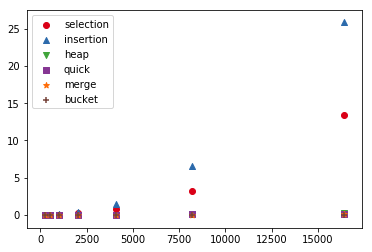

In [22]:
# linear plot
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'], marker=sort['marker'])
plt.legend()

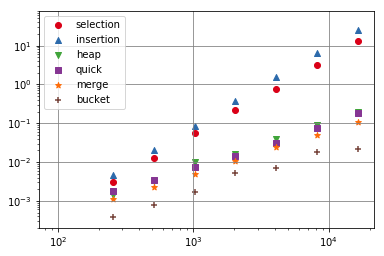

In [23]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'], marker=sort['marker'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-4, 80)
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [11]:
ns_fit = []
for p in power_range:
    for pp in range(10):
        ns_fit.append(2**(p+0.1*pp))
        
fit_params = {}
for sort in sorts:
    fit_params[sort['label']], _ = curve_fit(sort['fit_func'], ns, times_all[sort['label']])

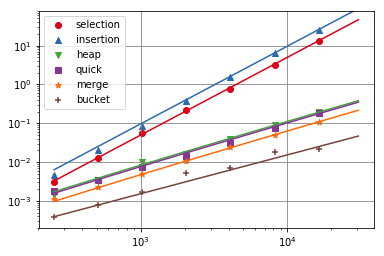

In [24]:
# log plot with fitting curve
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'], marker=sort['marker'])
    plt.plot(ns_fit, sort['fit_func'](np.array(ns_fit), fit_params[sort['label']][0]), color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-4, 80)
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [14]:
times_all_duplicate = {}
for sort in sorts:
    print(sort['label'])
    times_all_duplicate[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, duplication=True)

selection
n=256 started...finished! time: 3.0306196212768555 ms.
n=512 started...finished! time: 11.704115867614746 ms.
n=1024 started...finished! time: 46.01372241973877 ms.
n=2048 started...finished! time: 189.3588352203369 ms.
n=4096 started...finished! time: 795.0888586044312 ms.
n=8192 started...finished! time: 3159.6582412719727 ms.
n=16384 started...finished! time: 13639.592018127441 ms.
insertion
n=256 started...finished! time: 3.232440948486328 ms.
n=512 started...finished! time: 17.201862335205078 ms.
n=1024 started...finished! time: 82.59200096130371 ms.
n=2048 started...finished! time: 362.02592372894287 ms.
n=4096 started...finished! time: 1553.2351398468018 ms.
n=8192 started...finished! time: 6408.475379943848 ms.
n=16384 started...finished! time: 24683.574323654175 ms.
heap
n=256 started...finished! time: 1.0044431686401367 ms.
n=512 started...finished! time: 2.834038734436035 ms.
n=1024 started...finished! time: 7.209157943725586 ms.
n=2048 started...finished! time: 16

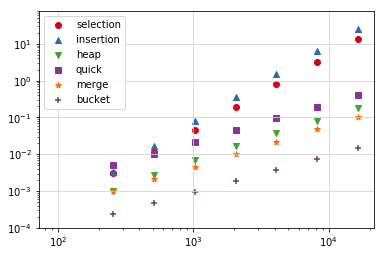

In [25]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_duplicate[sort['label']], label=sort['label'], color=sort['color'], marker=sort['marker'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 80)
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [17]:
times_all_sorted = {}
for sort in sorts:
    print(sort['label'])
    times_all_sorted[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, is_sorted=True)

selection
n=256 started...finished! time: 4.4007158279418945 ms.
n=512 started...finished! time: 18.206181526184082 ms.
n=1024 started...finished! time: 78.86384010314941 ms.
n=2048 started...finished! time: 290.92148303985596 ms.
n=4096 started...finished! time: 1151.8253421783447 ms.
n=8192 started...finished! time: 4424.711141586304 ms.
n=16384 started...finished! time: 17145.60209751129 ms.
insertion
n=256 started...finished! time: 0.1416635513305664 ms.
n=512 started...finished! time: 0.2941608428955078 ms.
n=1024 started...finished! time: 0.5942583084106445 ms.
n=2048 started...finished! time: 1.2967777252197266 ms.
n=4096 started...finished! time: 2.702059745788574 ms.
n=8192 started...finished! time: 5.095858573913574 ms.
n=16384 started...finished! time: 11.04830265045166 ms.
heap
n=256 started...finished! time: 1.8294811248779297 ms.
n=512 started...finished! time: 4.251499176025391 ms.
n=1024 started...finished! time: 8.220376968383789 ms.
n=2048 started...finished! time: 17

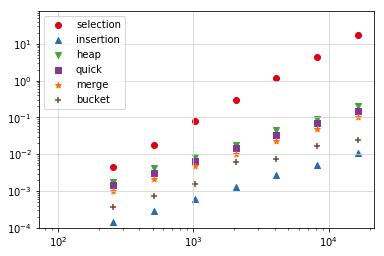

In [26]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_sorted[sort['label']], label=sort['label'], color=sort['color'], marker=sort['marker'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 80)
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [28]:
times_all_sorted_swaped = {}
for sort in sorts:
    print(sort['label'])
    times_all_sorted_swaped[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, is_sorted=True, num_swaps=4)

selection
n=256 started...finished! time: 3.698244094848633 ms.
n=512 started...finished! time: 14.52120304107666 ms.
n=1024 started...finished! time: 58.01503658294678 ms.
n=2048 started...finished! time: 253.05346012115476 ms.
n=4096 started...finished! time: 950.911545753479 ms.
n=8192 started...finished! time: 3834.7335243225098 ms.
n=16384 started...finished! time: 15242.440900802612 ms.
insertion
n=256 started...finished! time: 0.30600547790527344 ms.
n=512 started...finished! time: 0.6714582443237305 ms.
n=1024 started...finished! time: 1.4145803451538086 ms.
n=2048 started...finished! time: 3.0850601196289062 ms.
n=4096 started...finished! time: 6.671934127807617 ms.
n=8192 started...finished! time: 12.690396308898926 ms.
n=16384 started...finished! time: 25.628881454467773 ms.
heap
n=256 started...finished! time: 1.4967632293701172 ms.
n=512 started...finished! time: 3.550543785095215 ms.
n=1024 started...finished! time: 7.813539505004883 ms.
n=2048 started...finished! time: 1

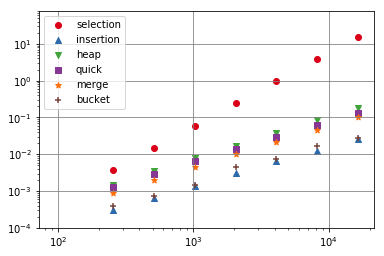

In [35]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_sorted_swaped[sort['label']], label=sort['label'], color=sort['color'], marker=sort['marker'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 80)
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [30]:
times_all_num_swaps = {}
for num_swaps in [0, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000]:
    print(num_swaps)
    times_all_num_swaps[num_swaps] = measure_times(insertion_sort, power_range=power_range, n_loop=n_loop, is_sorted=True, num_swaps=num_swaps)

0
n=256 started...finished! time: 0.17928123474121094 ms.
n=512 started...finished! time: 0.27469635009765625 ms.
n=1024 started...finished! time: 0.5853796005249023 ms.
n=2048 started...finished! time: 1.1544179916381836 ms.
n=4096 started...finished! time: 2.3820972442626953 ms.
n=8192 started...finished! time: 4.813117980957031 ms.
n=16384 started...finished! time: 9.57402229309082 ms.
1
n=256 started...finished! time: 0.1672220230102539 ms.
n=512 started...finished! time: 0.3753376007080078 ms.
n=1024 started...finished! time: 0.7970380783081055 ms.
n=2048 started...finished! time: 1.6502189636230469 ms.
n=4096 started...finished! time: 3.455638885498047 ms.
n=8192 started...finished! time: 6.895842552185059 ms.
n=16384 started...finished! time: 12.779154777526855 ms.
3
n=256 started...finished! time: 0.2540779113769531 ms.
n=512 started...finished! time: 0.6045770645141602 ms.
n=1024 started...finished! time: 1.262960433959961 ms.
n=2048 started...finished! time: 2.765898704528808

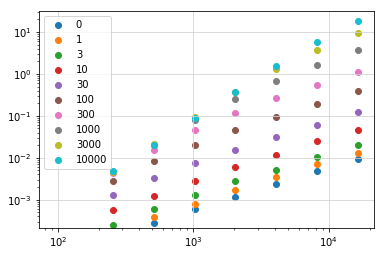

In [31]:
# log plot
for num_swaps in times_all_num_swaps.keys():
    plt.scatter(ns, times_all_num_swaps[num_swaps], label=num_swaps)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [32]:
def measure_times_for_small(a_sort, n_range=(2, 12, 2), n_loop=1000, max_int=100):
    times = []
    for n in n_range:
        print("n=" + str(n) + " started...", end="")
        
        arrays = [list(np.random.randint(0, max_int+1, n)) for _ in range(n_loop)]
                        
        start_time = time.time()
        for array in arrays:
            a_sort(array)
        averaged_time = (time.time() - start_time) / n_loop
        times.append(averaged_time)
        print("finished! time: " + str(averaged_time * 1000) + " ms.")
    
    return times

In [33]:
times_all_small = {}
n_range = range(2, 16, 2)
n_loop = 100000
for sort in sorts:
    print(sort['label'])
    times_all_small[sort['label']] = measure_times_for_small(sort['sort'], n_range=n_range, n_loop=n_loop)

selection
n=2 started...finished! time: 0.0012608790397644041 ms.
n=4 started...finished! time: 0.002937948703765869 ms.
n=6 started...finished! time: 0.005037617683410644 ms.
n=8 started...finished! time: 0.007316858768463134 ms.
n=10 started...finished! time: 0.010270330905914307 ms.
n=12 started...finished! time: 0.013026001453399659 ms.
n=14 started...finished! time: 0.016522080898284913 ms.
insertion
n=2 started...finished! time: 0.0011022424697875977 ms.
n=4 started...finished! time: 0.002718980312347412 ms.
n=6 started...finished! time: 0.0049562716484069826 ms.
n=8 started...finished! time: 0.007727720737457275 ms.
n=10 started...finished! time: 0.01101835012435913 ms.
n=12 started...finished! time: 0.014871749877929687 ms.
n=14 started...finished! time: 0.019544858932495118 ms.
heap
n=2 started...finished! time: 0.002539939880371094 ms.
n=4 started...finished! time: 0.006171119213104248 ms.
n=6 started...finished! time: 0.010798330307006837 ms.
n=8 started...finished! time: 0.

(0.0, 5e-05)

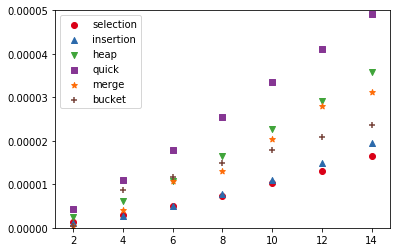

In [34]:
# linear plot
for sort in sorts:
    plt.scatter(n_range, times_all_small[sort['label']], label=sort['label'], color=sort['color'], marker=sort['marker'])
plt.legend()
plt.ylim(0.0, 0.00005)